# Importamos todas las librerias necesarias para el proyecto y el database

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Modelos a comparar
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,log_loss



#Cargamos el archivo .csv que es el database del proyecto y visualizamos algunas caracteristicas de él

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/isaavedrab85/PROYECTO/refs/heads/main/PROYECTO/01database.csv',sep=';')
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RUT          613 non-null    int64  
 1   SEXO         613 non-null    object 
 2   TIPO COL     613 non-null    int64  
 3   COMUNA       613 non-null    object 
 4   P_POND       613 non-null    float64
 5   P_PROM       613 non-null    float64
 6   P_NEM        613 non-null    int64  
 7   RK_COL       613 non-null    int64  
 8   P_LEN        613 non-null    int64  
 9   P_M1         613 non-null    int64  
 10  POND_SIN_M2  613 non-null    float64
 11  P_M2         613 non-null    int64  
 12  P_HIST       613 non-null    int64  
 13  P_CIENC      613 non-null    int64  
 14  MAX_C_H      613 non-null    int64  
 15  DIAG_MAT     613 non-null    float64
 16  AYG_24-1     613 non-null    float64
 17  C1_24-1      613 non-null    float64
 18  AL_24-2      613 non-null    float64
 19  C2_24-2 

,RUT,TIPO COL,P_POND,P_PROM,P_NEM,RK_COL,P_LEN,P_M1,POND_SIN_M2,P_M2,...,C2_24-2,AYG_24-2,C1_24-2,AP_AYG,AP_CI,AP_AL,AP_C2,AP_AYG_2,AP_CI_2,Total
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,...,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,307.000000,2.091354,705.314519,700.242251,749.657423,774.440457,674.528548,725.955954,683.165987,442.970636,...,3.853311,0.658418,0.514869,77487.765090,8189.233279,688.417618,67.047308,1.076672,0.079935,86433.619902
std,177.102136,0.572924,68.437849,83.492038,111.307632,128.097958,90.987580,104.960324,66.690282,80.165387,...,2.175082,1.538108,1.383147,41800.396342,3853.961746,463.518381,47.042527,3.102128,0.271414,44948.986282
min,1.000000,0.000000,503.000000,426.500000,356.000000,364.000000,375.000000,452.000000,481.600000,246.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,2.000000,654.300000,640.500000,680.000000,685.000000,600.000000,657.000000,635.550000,393.000000,...,2.600000,0.000000,0.000000,100000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,101001.000000
50%,307.000000,2.000000,711.900000,695.500000,757.000000,782.000000,679.000000,717.000000,690.800000,437.000000,...,4.600000,0.000000,0.000000,100000.000000,10000.000000,1000.000000,100.000000,0.000000,0.000000,111100.000000
75%,460.000000,2.000000,751.550000,758.000000,837.000000,872.000000,738.000000,797.000000,729.700000,487.000000,...,5.325000,0.000000,0.000000,100000.000000,10000.000000,1000.000000,100.000000,0.000000,0.000000,111100.000000
max,613.000000,4.000000,919.050000,907.000000,1000.000000,1000.000000,935.000000,990.000000,885.950000,718.000000,...,7.000000,5.975000,6.080000,100000.000000,10000.000000,1000.000000,100.000000,10.000000,1.000000,111100.000000


#Codificamos las variables que son "objeto" o etiquetas.

In [7]:
# Codificar la variable SEXO, TIPO COLEGIO, COMUNA COLEGIO, AP_AYG, AP_CI, AP_AL, AP_C2, AP_AYG_2, AP_CI_2
le = LabelEncoder()
df['SEXO'] = le.fit_transform(df['SEXO'])
df['TIPO COL'] = le.fit_transform(df['TIPO COL'])
df['COMUNA'] = le.fit_transform(df['COMUNA'])
df['AP_AYG'] = le.fit_transform(df['AP_AYG'])
df['AP_CI'] = le.fit_transform(df['AP_CI'])
df['AP_AL'] = le.fit_transform(df['AP_AL'])
df['AP_C2'] = le.fit_transform(df['AP_C2'])
df['AP_AYG_2'] = le.fit_transform(df['AP_AYG_2'])
df['AP_CI_2'] = le.fit_transform(df['AP_CI_2'])
#df['Total'] = le.fit_transform(df['Total'])
#print(df.value_counts('Total'))
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   RUT          613 non-null    int64  
 1   SEXO         613 non-null    int64  
 2   TIPO COL     613 non-null    int64  
 3   COMUNA       613 non-null    int64  
 4   P_POND       613 non-null    float64
 5   P_PROM       613 non-null    float64
 6   P_NEM        613 non-null    int64  
 7   RK_COL       613 non-null    int64  
 8   P_LEN        613 non-null    int64  
 9   P_M1         613 non-null    int64  
 10  POND_SIN_M2  613 non-null    float64
 11  P_M2         613 non-null    int64  
 12  P_HIST       613 non-null    int64  
 13  P_CIENC      613 non-null    int64  
 14  MAX_C_H      613 non-null    int64  
 15  DIAG_MAT     613 non-null    float64
 16  AYG_24-1     613 non-null    float64
 17  C1_24-1      613 non-null    float64
 18  AL_24-2      613 non-null    float64
 19  C2_24-2 

# Normalizamos los datos a escala común (promedio 0 y des. est. 1) y seleccionamos del dataset las variables explicativas: SEXO, TIPO COLEGIO, COMUNA COLEGIO, P. NEM, P. RANKING, P. PAES LENGUAJE, P. PAES M1, P. PAES M2, P. PAES CIENCIAS o HISTORIA y P. DIAGNOSTICO MATEMATICAS para  nuestra variable objetivo: APROBACIÓN CÁLCULO I

In [9]:
# Seleccionar características
features = df.columns[[1,2,3,6,7,8,9,11,14,15]]  # seleccionó las variables explicativas

# Normalizar características
scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features) #creo un dataset con las variables explicativas

# Agregar la variable objetivo APROBACIÓN CÁLCULO I codificada
df_scaled['AP_CI_en'] = le.fit_transform(df['AP_CI'])

df_scaled.head()


# Ahora X y y se definen usando la columna codificada
X = df_scaled.drop(columns=["AP_CI_en"]) # Features (excluir la columna codificada del target)
y = df_scaled["AP_CI_en"]             # Target codificado
# --- End of Change ---

#X.head()
#y.head()


#Contruimos las matriz de Correlación entre las variables

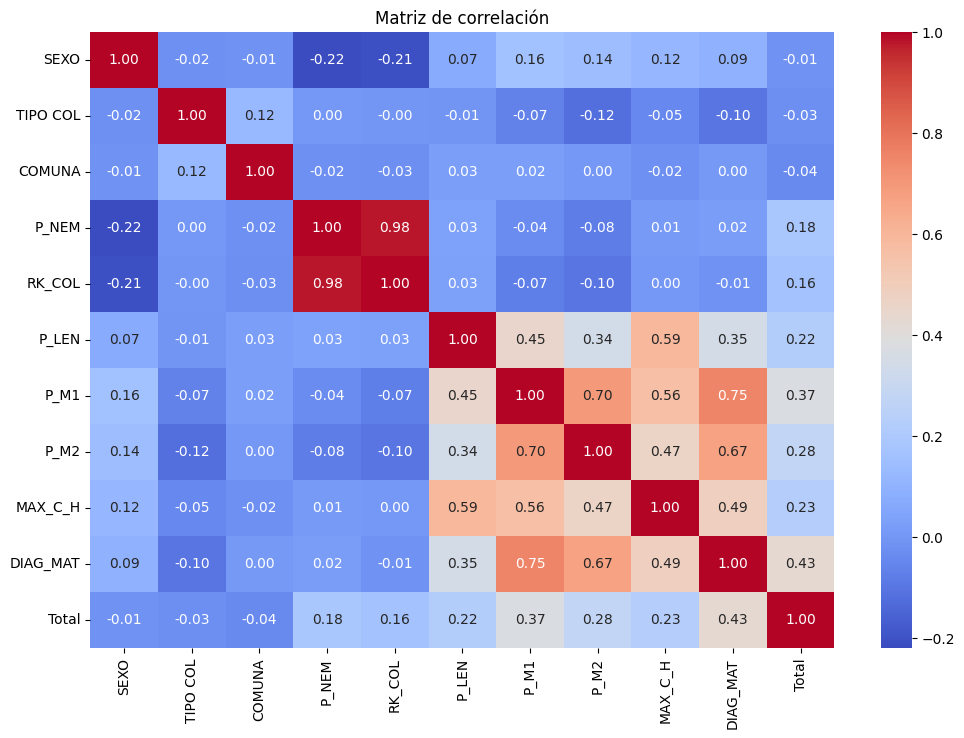

In [ ]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
corr = df_scaled.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

## Relación gráfica entre variables continuas explicativas y objetivo

<Figure size 8000x4000 with 0 Axes>

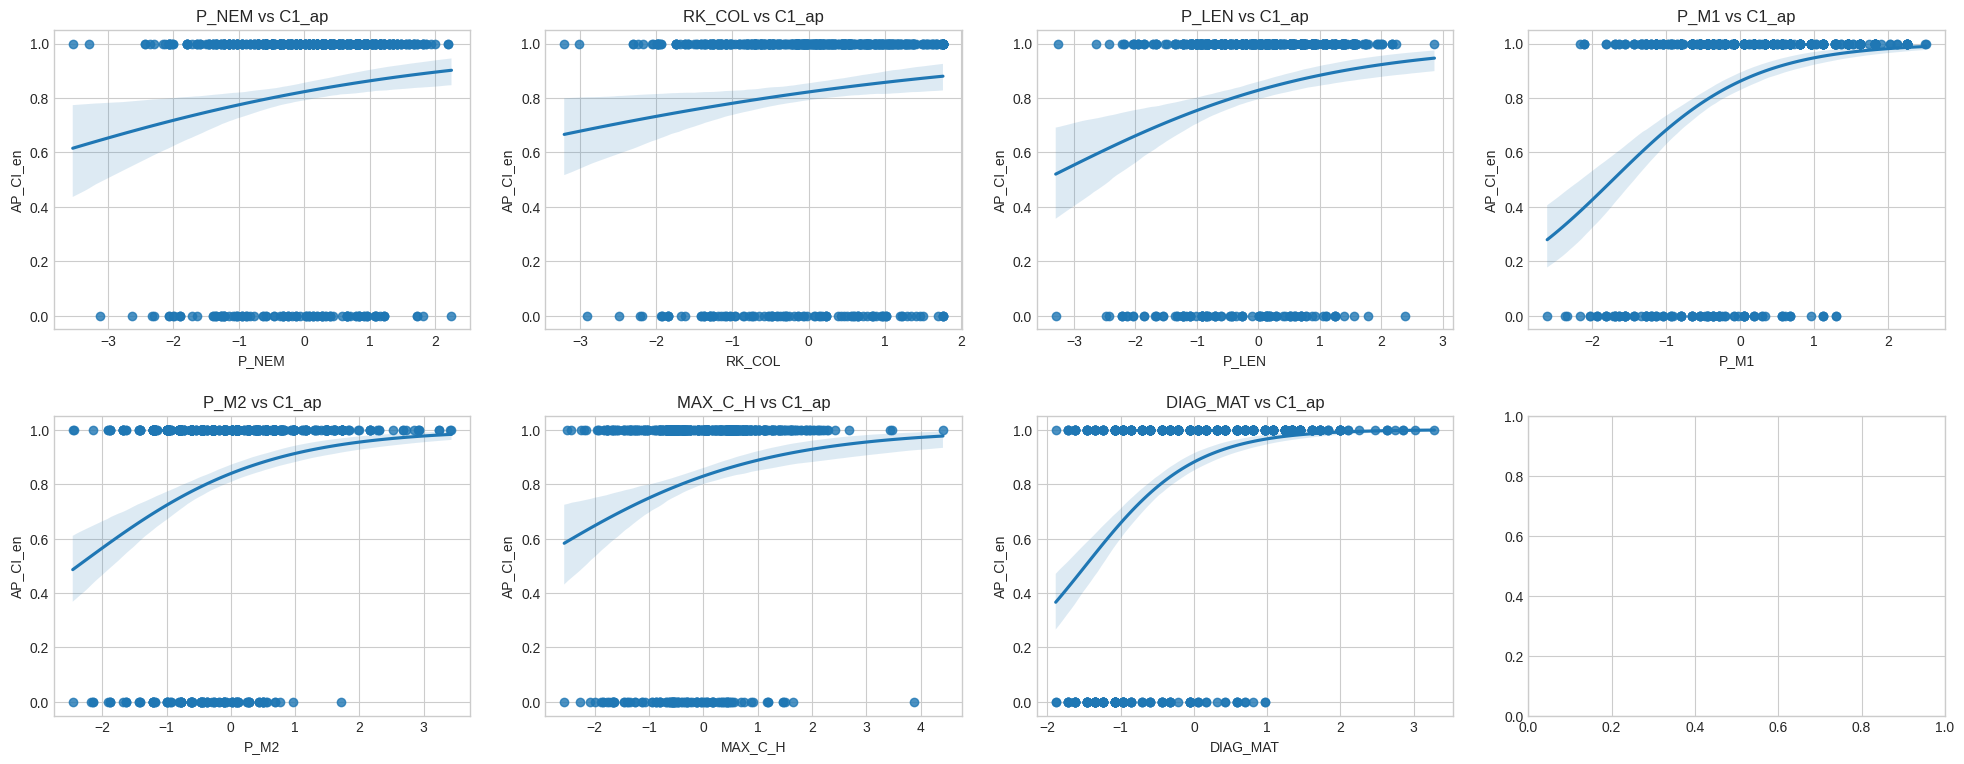

In [10]:
# Configura el estilo y el tamaño general de la figura
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(80,40))  # Tamaño total de la figura (ancho, alto)

# Crea una cuadrícula 2x2
fig, axes = plt.subplots(2, 4, figsize=(20, 8))

# Gráfico 4: NEM vs C1_ap
sns.regplot(data=df_scaled, x="P_NEM", y="AP_CI_en", logistic=True, ax=axes[0, 0])
axes[0,0].set_title('P_NEM vs C1_ap')

# Gráfico 5: RK_COL vs C1_ap
sns.regplot(data=df_scaled, x="RK_COL", y="AP_CI_en", logistic=True, ax=axes[0, 1])
axes[0,1].set_title('RK_COL vs C1_ap')

# Gráfico 6: P_LEN vs C1_ap
sns.regplot(data=df_scaled, x="P_LEN", y="AP_CI_en", logistic=True, ax=axes[0,2])
axes[0,2].set_title('P_LEN vs C1_ap')

# Gráfico 7: P_M1 vs C1_ap
sns.regplot(data=df_scaled, x="P_M1", y="AP_CI_en", logistic=True, ax=axes[0, 3])
axes[0,3].set_title('P_M1 vs C1_ap')

# Gráfico 8: P_M2 vs C1_ap
sns.regplot(data=df_scaled, x="P_M2", y="AP_CI_en", logistic=True, ax=axes[1, 0])
axes[1,0].set_title('P_M2 vs C1_ap')

# Gráfico 9: MAX_C_H vs C1_ap
sns.regplot(data=df_scaled, x="MAX_C_H", y="AP_CI_en", logistic=True, ax=axes[1,1 ])
axes[1,1].set_title('MAX_C_H vs C1_ap')


# Gráfico 10: DIAG_MAT vs C1_ap
sns.regplot(data=df_scaled, x="DIAG_MAT", y="AP_CI_en", logistic=True, ax=axes[1, 2])
axes[1, 2].set_title('DIAG_MAT vs C1_ap')

# Ajusta el espacio entre subplots
plt.tight_layout(pad=2.0)

# Muestra la figura
plt.show()
